# Data Cleaning & EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import dython.data_utils as du
import dython.nominal as nom
import matplotlib.pyplot as plt
from datetime import datetime


pd.set_option('display.max_columns', None)


In [2]:
X = pd.read_csv('data/X_train_comp.csv', index_col=0)
y = pd.read_csv('data/y_train_comp.csv', index_col=0)

In [3]:
#check X and y ids match
print(len(X))
sum(X.index == y.index)

59400


59400

In [4]:
df = pd.concat([X, y], axis =1)
df.head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [6]:
df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Many of the columns are very similar so I'll check the association.

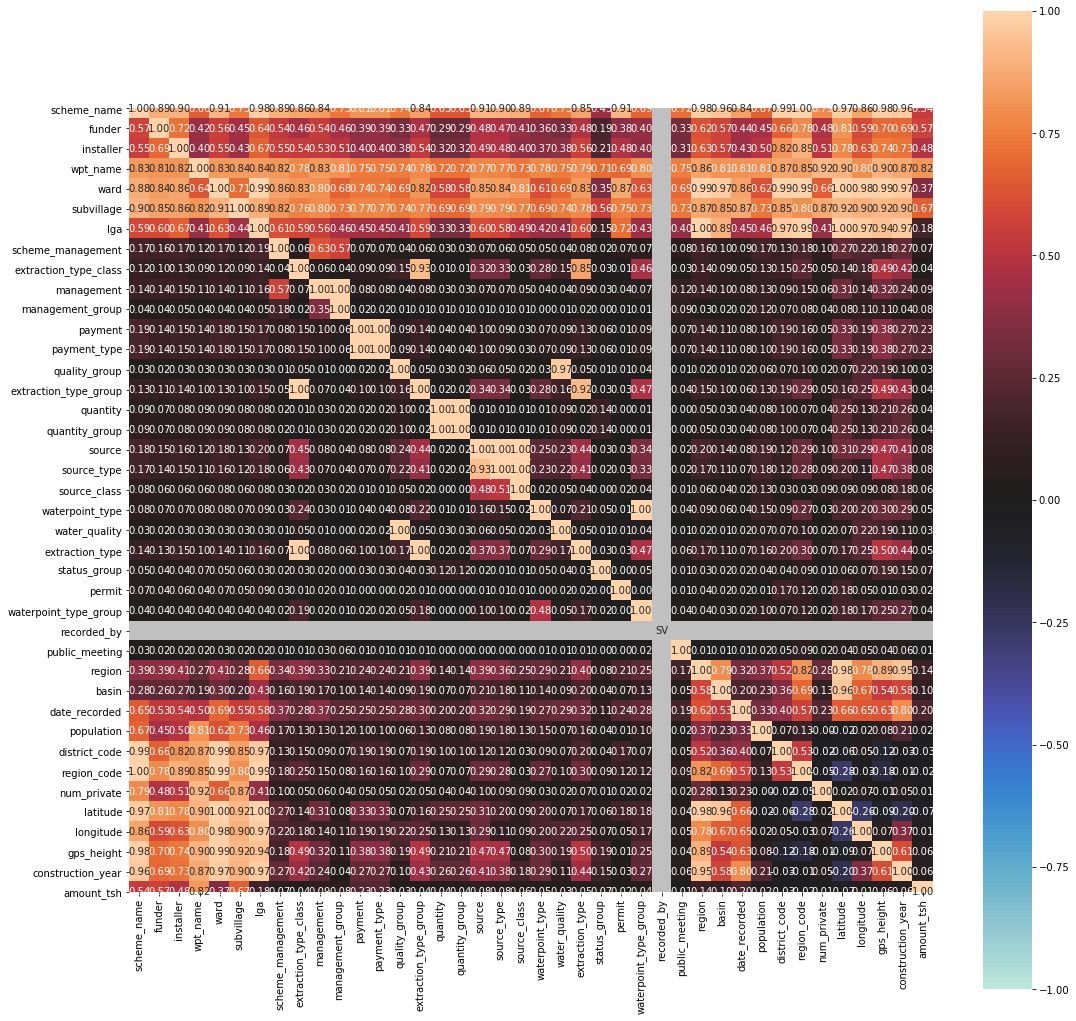

In [7]:
assoc2 = nom.associations(df.copy(), theil_u=True, clustering=True, 
                         nan_strategy='drop_samples', figsize=(18,18))

In [8]:
corr = assoc2['corr'].abs().stack().reset_index().sort_values(0, ascending = False)
corr = corr[corr.level_0 != corr.level_1]

In [9]:
corr['pairs1'] = list(zip(corr.level_0, corr.level_1))
corr['pairs2'] = list(zip(corr.level_1, corr.level_0))

In [10]:
corr1 = corr.set_index('pairs1').drop(['level_0', 'level_1', 'pairs2'], axis=1)
corr2 = corr.set_index('pairs2').drop(['level_0', 'level_1', 'pairs1'], axis=1)
corr1.columns = ['cc1']
corr2.columns = ['cc2']
corr1 = corr1.sort_index()
corr2 = corr2.sort_index()
print(sum(corr1.index == corr2.index))    #Check the indices match
corr3 = pd.concat([corr1, corr2], axis=1)
print(sum(corr3.cc1 == corr3.cc2))        #Check for assymetric pairs
corr3.sort_values(['cc1', 'cc2'], ascending=False)

1560
694


,cc1,cc2
"(payment, payment_type)",1.0,1.000000
"(payment_type, payment)",1.0,1.000000
"(quantity, quantity_group)",1.0,1.000000
"(quantity_group, quantity)",1.0,1.000000
"(water_quality, quality_group)",1.0,0.973053
...,...,...
"(ward, recorded_by)",0.0,0.000000
"(water_quality, recorded_by)",0.0,0.000000
"(waterpoint_type, recorded_by)",0.0,0.000000
"(waterpoint_type_group, recorded_by)",0.0,0.000000


In [11]:
corr[corr[0] == 1]

,level_0,level_1,0,pairs1,pairs2
491,payment_type,payment,1.0,"(payment_type, payment)","(payment, payment_type)"
698,source,source_type,1.0,"(source, source_type)","(source_type, source)"
655,quantity_group,quantity,1.0,"(quantity_group, quantity)","(quantity, quantity_group)"
616,quantity,quantity_group,1.0,"(quantity, quantity_group)","(quantity_group, quantity)"
568,extraction_type_group,extraction_type_class,1.0,"(extraction_type_group, extraction_type_class)","(extraction_type_class, extraction_type_group)"
452,payment,payment_type,1.0,"(payment, payment_type)","(payment_type, payment)"
370,management,management_group,1.0,"(management, management_group)","(management_group, management)"
268,lga,region,1.0,"(lga, region)","(region, lga)"
699,source,source_class,1.0,"(source, source_class)","(source_class, source)"
739,source_type,source_class,1.0,"(source_type, source_class)","(source_class, source_type)"


## Column Drops
Drop recorded_by as all values are the same

In [12]:
df.drop('recorded_by', axis=1, inplace=True)

### Potential drops 

-similar columns:   
2 of extraction_type_class(7), extraction_type_group(13), extraction_type(18)   
2 of management_group(5), scheme_management(12), management(12)  
1 of payment(7), payment_type(7)   
1 of quality_group(6), water_quality(8)   
1 of quantity_group(5), quantity(5)   
1 of source_class(3), source_type(7), source(10)   
1 of waterpoint_type_group(6), waterpoint_type(7)       

amount_tsh -due to amount of missing data

In [13]:
col_drop = ['extraction_type_class', 'extraction_type_group', 'management_group', 'scheme_management', 
            'scheme_name', 'payment', 'quality_group', 'quantity_group', 'source_class', 'source_type', 
            'waterpoint_type_group', 'amount_tsh']

In [14]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


## Categorical numbers
Some features are numeric but refer to categories, I'll change these to objects.

In [15]:
cols = ['region_code', 'district_code']
for col in cols:
    df.loc[:,col] = df[col].astype('object')

## Missing Values

### Fill 'unknown'

In [16]:
unknown = []
du.identify_columns_with_na(df)

,column,na_count
19,scheme_name,28166
18,scheme_management,3877
4,installer,3655
2,funder,3635
17,public_meeting,3334
20,permit,3056
10,subvillage,371


In [17]:
snc = corr[corr.level_1 == 'scheme_name']
snc

,level_0,level_1,0,pairs1,pairs2
1320,region_code,scheme_name,0.996415,"(region_code, scheme_name)","(scheme_name, region_code)"
1280,district_code,scheme_name,0.988867,"(district_code, scheme_name)","(scheme_name, district_code)"
1480,gps_height,scheme_name,0.983963,"(gps_height, scheme_name)","(scheme_name, gps_height)"
1400,latitude,scheme_name,0.968919,"(latitude, scheme_name)","(scheme_name, latitude)"
1520,construction_year,scheme_name,0.964743,"(construction_year, scheme_name)","(scheme_name, construction_year)"
200,subvillage,scheme_name,0.900251,"(subvillage, scheme_name)","(scheme_name, subvillage)"
160,ward,scheme_name,0.879387,"(ward, scheme_name)","(scheme_name, ward)"
1440,longitude,scheme_name,0.864780,"(longitude, scheme_name)","(scheme_name, longitude)"
120,wpt_name,scheme_name,0.830787,"(wpt_name, scheme_name)","(scheme_name, wpt_name)"
1360,num_private,scheme_name,0.785354,"(num_private, scheme_name)","(scheme_name, num_private)"


In [18]:
print(len(df[df.scheme_name.notna()]))
df.scheme_name.value_counts()

31234


K                                   682
None                                644
Borehole                            546
Chalinze wate                       405
M                                   400
                                   ... 
Nyasho mlimani                        1
Zahanati pipeline                     1
JongoJ                                1
Heshivu water supply                  1
mwamagembe windmill piped scheme      1
Name: scheme_name, Length: 2696, dtype: int64

In [19]:
df[df.scheme_name.isna()].status_group.value_counts(normalize=True)

functional                 0.514379
non functional             0.414471
functional needs repair    0.071150
Name: status_group, dtype: float64

scheme_name:   

Almost half the values are missing. Of those included there are 2696 different values, which hinders filling the missing ones.This feature also has high association with other features. However a waterpoint with a missing scheme name is more likely to be non-functional than one with a scheme name, so I'll leave the column in for now and fill missing values with 'unknown'.

In [20]:
unknown.append('scheme_name')
unknown.append('scheme_management')

In [21]:
print(len(df.installer.value_counts()))
print(len(df.funder.value_counts()))
#installer, funder   
#With so many different values I'm going to replace the missing with 'unknown'
unknown.append('installer')
unknown.append('funder')

2145
1897


In [22]:
print(df.public_meeting.value_counts())
print(df.permit.value_counts())
#public_meeting, permit
#Will replace missing values with 'unknown'
unknown.append('public_meeting')
unknown.append('permit')

True     51011
False     5055
Name: public_meeting, dtype: int64
True     38852
False    17492
Name: permit, dtype: int64


In [23]:
df.subvillage.value_counts()
unknown.append('subvillage')

In [24]:
for col in unknown:
    df[col].fillna('unknown', inplace=True)

## Placeholder Values

In [25]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,30500.000000,2013.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null object
district_code            59400 non-null object
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null o

In [27]:
def col_eda(col):
    print(col,':\n', df[col].value_counts().head(15),'\n')

In [28]:
for col in df:
    col_eda(col)

amount_tsh :
 0.0       41639
500.0      3102
50.0       2472
1000.0     1488
20.0       1463
200.0      1220
100.0       816
10.0        806
30.0        743
2000.0      704
250.0       569
300.0       557
5000.0      450
5.0         376
25.0        356
Name: amount_tsh, dtype: int64 

date_recorded :
 2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
Name: date_recorded, dtype: int64 

funder :
 Government Of Tanzania    9084
unknown                   3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private 

quantity_group :
 enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64 

source :
 spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64 

source_type :
 spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64 

source_class :
 groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64 

waterpoint_type :
 communal standpipe             28522
hand pump                      17488
other                         

Columns with imputable placeholders:
- gps_height
- longitude
- latitude
- population
- construction year

Negative gps_height:   
The lowest point in Tanzania is sea level however the geoid height is negative in Tanzania, so negative gps-height is possible. Still, looking at the data the value of -90 seems a bit too much, I'll replace with zero


In [29]:
df.loc[38774, 'gps_height'] = 0

In [30]:
df.sort_values('gps_height').head(20)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41857,50.0,2013-03-13,0,-63,0,39.371220,-6.866154,Kwa Kweka 2,0,Wami / Ruvu,Kwa Kweka 2,Dar es Salaam,7,3,Temeke,Mji Mwema,150,True,WUG,unknown,False,2000,mono,mono,motorpump,wug,user-group,pay per bucket,per bucket,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
44724,10.0,2013-02-04,Mtuwasa,-63,MTUWASA,40.154793,-10.266446,Kioski Cha Miseti,0,Ruvuma / Southern Coast,Miseti,Mtwara,9,5,Mtwara Urban,Chuno,353,True,Water authority,Miseti,True,2007,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
22837,0.0,2013-03-15,0,-59,0,39.415133,-6.865505,Kwa Mzee Said Mkarakara,0,Wami / Ruvu,Mbwamaji,Dar es Salaam,7,3,Temeke,Somangira,90,True,VWC,unknown,False,1970,mono,mono,motorpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other,non functional
56147,20.0,2011-03-06,Government Of Tanzania,-57,Centr,39.275344,-7.792055,Fisheries,0,Rufiji,Nyamisati A,Pwani,60,53,Rufiji,Salale,1,True,VWC,unknown,True,1974,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
16026,0.0,2011-03-13,Siss M. Minghetti,-55,AMREF,39.424667,-7.231753,Kiwanjani,0,Wami / Ruvu,Boza,Pwani,6,4,Mkuranga,Shungubweni,50,True,VWC,unknown,False,2007,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
53930,0.0,2013-03-15,0,-54,0,39.415811,-6.865826,Kwa Mohamed Bi Selemani,0,Wami / Ruvu,Mbwamaji,Dar es Salaam,7,3,Temeke,Somangira,140,True,VWC,unknown,False,1970,mono,mono,motorpump,vwc,user-group,never pay,never pay,salty,salty,dry,dry,machine dbh,borehole,groundwater,other,other,non functional
27293,0.0,2011-03-06,Fptc - Pent,-53,FPTC,39.273032,-7.792041,Pentecostal Church 3,0,Rufiji,Nyamisati A,Pwani,60,53,Rufiji,Salale,1,True,Trust,unknown,True,2008,mono,mono,motorpump,trust,commercial,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
49097,50.0,2013-03-18,0,-52,0,39.521571,-7.128883,Kwa Sharia,0,Wami / Ruvu,Buyuni,Dar es Salaam,7,3,Temeke,Pemba Mnazi,50,True,VWC,unknown,False,2000,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
64309,0.0,2011-03-06,Fpct,-52,FPCT,39.273376,-7.792228,Fpct 2,0,Rufiji,Nyamisati A,Pwani,60,53,Rufiji,Salale,56,True,Trust,unknown,False,1986,mono,mono,motorpump,trust,commercial,never pay,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [31]:
df[df.latitude == -2.000000e-08].groupby('subvillage').sum().sum()

amount_tsh           0.000000
gps_height           0.000000
longitude            0.000000
latitude            -0.000036
num_private          0.000000
population           0.000000
construction_year    0.000000
dtype: float64

In [32]:
df.latitude.replace(-2.000000e-08, 0, inplace=True)
# replace placeholder with 0 -the placeholder used in other columns

In [33]:
df[df.gps_height == 0].groupby('subvillage').sum().sum()

amount_tsh           1.973300e+05
gps_height           0.000000e+00
longitude            6.226348e+05
latitude            -9.401388e+04
num_private          1.410000e+03
population           3.270570e+05
construction_year    1.521764e+06
dtype: float64

Missing data spreads across whole subvillages -can't use common subvillage as a basis to impute 

In [34]:
df.ward.value_counts()
df[df.ward == 'Igosi'].describe()
# -mostly low std within ward

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
count,307.000000,307.000000,307.000000,307.000000,307.0,307.000000,307.00000
mean,646.579805,2112.713355,34.524122,-9.304804,0.0,46.879479,2000.85342
std,1228.612998,107.998347,0.059948,0.052625,0.0,51.818895,7.72112
min,0.000000,1240.000000,34.341349,-9.407268,0.0,1.000000,1967.00000
25%,0.000000,2040.000000,34.501329,-9.336491,0.0,20.000000,1998.00000
50%,0.000000,2138.000000,34.543249,-9.302873,0.0,30.000000,2004.00000
75%,1000.000000,2166.000000,34.565991,-9.278314,0.0,50.000000,2006.00000
max,4000.000000,2385.000000,34.631938,-8.723208,0.0,367.000000,2010.00000


In [35]:
# find the average std for each of the following features
feats = ['gps_height', 'longitude', 'latitude', 'population', 'construction_year']
stds = {}
for feat in feats:
    ft = {}
    for col in ['funder', 'installer', 'basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 
                'extraction_type', 'management']:
        ft[col] = df[df[feat] !=0 ].groupby(col).std().mean()[feat]
    stds[feat] = ft

In [36]:
stds = pd.DataFrame(stds)
stds

,gps_height,longitude,latitude,population,construction_year
funder,139.735304,0.413486,0.413893,314.868414,3.579092
installer,111.105345,0.325528,0.335002,322.795894,3.728438
basin,386.719965,1.074301,0.766619,567.550554,11.726672
region,237.105158,0.463289,0.494068,521.778682,11.504431
region_code,200.702382,0.412843,0.434344,512.417501,11.358032
district_code,269.550958,1.176529,1.288767,527.799787,12.240492
lga,164.136629,0.168290,0.180460,506.873587,10.775541
ward,53.116762,0.059581,0.056525,339.171550,7.878065
extraction_type,465.584615,2.371679,2.335795,556.892186,9.881775
management,453.932029,2.201895,2.183873,512.610675,11.629500


In [37]:
# for each feature to impute (fi), for each row in stds -in order from lowest to highest std- for each 
#...category in that row's feature, find the mean of fi -not including 0-values.
#Replace that category's fi's 0-values with the computed mean; if mean was found.
for feat in feats:
    print(feat, '------------------------------------------------------------')
    for row in stds[feat].sort_values().index:
        print(row, '----------------------------------')
        if 0 in df[feat]:
            for v in df[row].unique():
                if len(df[(df[row] == v) & (df[feat] == 0.0)]) == 0:
                    continue
                else:
                    print(v)
                    mean = df[(df[feat] != 0) & (df[row] == v)][feat].mean()
                    if not np.isnan(mean):
                        print(mean)
                        df.loc[(df[feat] == 0) & (df[row] == v), feat] = mean
                    else:
                        print('nan')
        else:
            break


gps_height ------------------------------------------------------------
ward ----------------------------------
Nyakasimbi
nan
Moa
nan
Samuye
nan
Chambo
nan
Itetemia
nan
Kaisho
nan
Busilili
nan
Nkoma
1322.88
Ikungulyabashashi
nan
Nyaishozi
nan
Dabalo
nan
Katumbasongwe
nan
Mnenia
nan
Kiwira
nan
Makwale
nan
Nyang'hwale
nan
Kiruruma
nan
Izimbya
nan
Isingiro
nan
Mawindi
nan
Ubaruku
nan
Kibeta
nan
Ushirika
nan
Mondo
nan
Bupandwamhela
nan
Kasharunga
nan
Chihanga
nan
Kiromo
5.654545454545454
Kyaka
nan
Misasi
nan
Mwantini
nan
Isanga
nan
Bwanga
nan
Lutebe
nan
Lusahunga
nan
Ndola
nan
Kimagai
nan
Kashenye
nan
Kaibanja
nan
Runazi
nan
Itete
327.5833333333333
Urambo
nan
Jana
nan
Usagara
nan
Buziku
nan
Utengule Usangu
nan
Ukune
nan
Ndalambo
nan
Kalenge
nan
Nyamigogo
nan
Kyela Urban
nan
Igigwa
nan
Kitunda
18.4559585492228
Ruhanga
nan
Mahongole
1540.061403508772
Rujewa
nan
Igurusi
nan
Igale
nan
Masumbwe
nan
Ipililo
nan
Nyanguge
nan
Nkinga
nan
Chinamili
nan
Mkongo
536.0849056603773
Bunamhala
1335.833333

901.9
Mkoka
276.4
Luswisi
nan
Kwamndolwa
nan
Nyakahanga
nan
Kafule
nan
Kanyigo
nan
Uyui
nan
Ulowa
nan
Kinang'weli
nan
Bugomora
nan
Ngorongo
5.666666666666667
Korogwe
nan
Ufuluma
nan
Kambikatoto
nan
Kinamapula
nan
Igurwa
nan
Ngombezi
nan
Idetemya
nan
Ivuna
nan
Chilionwa
nan
Mwitikira
nan
Lubiga
nan
Magiri
nan
Chela
nan
Sumbugu
nan
Ifumbo
nan
Iselamagazi
nan
Masanga
nan
Iseni
nan
Berega
nan
Kakora
nan
Bulige
nan
Itumba
nan
Izigo
nan
Mwamanga
nan
Mabira
nan
Bunambiu
nan
Ijumbi
nan
Imalamakoye
nan
Igandu
nan
Ibugule
nan
Bungulwa
nan
Haneti
nan
Manza
nan
Ilindi
nan
Usinge
nan
Nkiniziwa
nan
Isagenhe
nan
Bukwimba
nan
Mhongolo
nan
Igalala
nan
Kibanga
nan
Lumbiji
1266.25
Mwamalasa
nan
Sima
nan
Ikowa
nan
Mngoyo
-3.125
Itundu
nan
Kishanda
nan
Mlowa Bwawani
nan
Kalunde
nan
Nyakalilo
nan
Usagali
nan
Iringa Mvumi
nan
Ziba
nan
Rushwa
nan
Mrijo
nan
Pangwi
nan
Bweni
-9.555555555555555
Kayanga
nan
Ushetu
nan
Mwang'halanga
nan
Itonjanda
nan
Bulyakashaju
nan
Kiloleni
nan
Zoissa
nan
Lyabukande
nan
Buyagu
n

nan
TLC/Samora
nan
VICFISH LTD
nan
Pet Coporation Ltd
nan
commu
nan
MI
nan
BUKUMB
nan
WIZARA
nan
MLAKI CO
nan
Segera Estate
nan
WADECO
nan
Cebtral Government
nan
SAXON
nan
KASHERE
nan
China
nan
Local technitian
nan
Usambala sisters
nan
hesawa
1594.5
Water Authority
nan
Mzung
nan
VILLAGE COUNCIL .ODA
nan
Totoland care
nan
Maswi drilling co ltd
nan
NGINIL
nan
VILLAG
1442.0434782608695
T
1253.0
Redep
nan
-
nan
germany
nan
AIXOS
nan
KASHWA
nan
Ardhi water well
nan
Conta
nan
SHUWASA
nan
Maendeleo ya jamii
nan
CARITAS
nan
SEMA CO LTD
nan
SENAPA
nan
Mamlaka ya maji ngara
nan
PRF
nan
Church
68.66666666666667
KAYEMPU LTD
nan
HESAW
nan
Moravian
nan
Samsoni
nan
MD
nan
St Gasper
nan
Msiki
117.0
EF
nan
MLAKI  CO
nan
BR
nan
local technitian
nan
KUMKUM
nan
APM
nan
TASA
1467.0
CSPD
1428.5
DALDO
1339.0
Howard and humfrey consultant
nan
LUNGWE
nan
AIC KI
nan
TMP
nan
WEDEKO
nan
UN ONE
nan
MasjId Takuar
nan
TWIG
nan
Tanzania Egypt Technical Co Op
nan
TCRS.TLC
nan
Eliza
nan
MAKE ENGINEERING
nan
EFAM
18.0
U

1066.8350680778146
Mem
246.25
Bgm
1045.2850961539136
Lcgd
1045.2850961539139
Dasp
1262.1666666666667
Msikiti
27.052083333333332
Jimbo Fund
1202.366724240164
Tlc/john Majala
nan
China Government
199.3170731707317
P
1291.2730786122088
Churc
1747.551724137931
Urt
1045.2850961539136
Water Aid /sema
1342.277777777778
Kirdep
nan
Ndrdp
1113.667526223817
Elct
509.5931411600279
Ukiligu
nan
The Desk And Chair Foundat
nan
Duwas
nan
Halmashauri Ya Manispa Tabora
125.33818181818181
Tuwasa
nan
Mboma
nan
K
nan
Idara Ya Maji
1275.566037735849
Mzungu Paul
nan
Caltas
400.0
Gaica
1045.2850961539139
Tcrs.Tlc
nan
Diocese Of Geita
nan
Total Landcare
nan
Tdft
nan
Kcu
nan
Abd
1045.2850961539136
Cmsr
1213.286826562616
Roman Catholic Rulenge Diocese
1045.2850961539139
W
nan
Partage
1045.2850961539139
Desk And Chair Foundation
nan
Aar
1219.0835036074334
Mileniam Project
nan
Institutional
nan
Williamson Diamond Ltd
nan
Redep
1100.2463764963093
Rwsp
1045.2850961539139
Moravian
1045.2850961539139
Millenium
nan
Kiji

Magu
33.64292257426607
installer ----------------------------------
region_code ----------------------------------
funder ----------------------------------
region ----------------------------------
basin ----------------------------------
district_code ----------------------------------
management ----------------------------------
extraction_type ----------------------------------
latitude ------------------------------------------------------------
ward ----------------------------------
Nkoma
-3.103338862033898
Ikungulyabashashi
nan
Nyang'hwale
nan
Chinamili
nan
Bunamhala
-2.8894244283333332
Malili
nan
Kalangalala
nan
Shigala
nan
Kasamwa
nan
Zagayu
nan
Nkungulu
-2.713540791212121
Mhunze
-2.9608215250666663
Mwaubingi
nan
Mhango
nan
Nyaluhande
nan
Katoro
-1.4006813250000003
Nyakabindi
nan
Dutwa
nan
Kabita
nan
Nkololo
nan
Lagangabilili
-2.9214216231428574
Gamboshi
nan
Mwaswale
nan
Somanda
nan
Lugulu
nan
Kalemela
nan
Sakwe
nan
Busolwa
nan
Kasoli
nan
Lubanga
nan
Mkula
-7.808401654230769

Sangea District Council
1402.5
Senapa
nan
Mamlaka Ya Maji Ngara
nan
Wama
nan
Prf
nan
Church
493.6666666666667
Kayempu Ltd
nan
Samsoni
nan
Ngos
419.6
St Gasper
nan
Wug And Ded
nan
Dwst
nan
Fao
700.0
Vttp
325.0
Br
5000.0
Koico
nan
Apm[africa Precious Metals Lt
nan
Shinyanga Shallow Wells
nan
Mtc
nan
Lungwe
nan
Aic Kij
nan
Nwssp
nan
Wanakijiji
nan
Suwasa
2408.8888888888887
Twig
nan
Tanzania Egypt Technical Co Op
nan
John Gileth
nan
Ustawi
nan
Milenia
nan
Water User Group
108.2
Ggm
nan
Baptist Church
400.0
Tgts
nan
Zaben
nan
Seram
nan
Adap
nan
Jipa
nan
W.D &
1.0
Lee Kang Pyung's Family
nan
Rwsssp
nan
Rural Drinking Water Supply
nan
Mhoranzi
nan
Quick Win Project
nan
Morovian Church
230.0
Greinaker
nan
Totoland
nan
Quick Win
nan
Prince Medium School
nan
Rc Mission
238.0
Ardhi Instute
nan
D Ct
nan
Vickfis
nan
Tempo
500.0
Koica And Tanzania Government
nan
Simavi
nan
Nrwssp
nan
Redcross
nan
Tlc/nyengesa Masanja
nan
Bridge North
nan
Lions C
nan
Maswi Drilling Co. Ltd
nan
Vodacom
235.0
Missionar

nan
KAYEMPU LTD
nan
Moravian
nan
Samsoni
nan
MD
nan
St Gasper
nan
Msiki
1.0
EF
nan
local technitian
nan
KUMKUM
nan
APM
nan
DALDO
433.33333333333326
MTC
nan
LUNGWE
nan
AIC KI
nan
TMP
nan
TWIG
nan
Tanzania Egypt Technical Co Op
nan
TCRS.TLC
nan
USTAWI
nan
Milenia
315.62105263157895
TGTS
nan
Seram
nan
ADAP
nan
Rural Drinking Water Supply
nan
Morovian church
230.0
Marti
219.7758069670821
GREINAKER
nan
Totoland
nan
PRINCE MEDIUM SCHOOL
nan
Ardhi Instute
219.77580696708213
VICKFI
nan
Ubalozi wa Marekani /DWE
nan
SIMAVI
nan
TLC/Nyengesa Masanja
nan
private
2403.277777777778
MASWI DRILLING CO. LTD
nan
GGM
nan
Missionary
nan
FAUSTINE
nan
Geita Goldmain
nan
GREINEKER
nan
Maswi
334.4605634289395
BENGUKA
nan
ODA
nan
Water Department
105.125
Stephano
nan
JAWABU
nan
OLS
nan
G.D&I.D
nan
BKHWS
nan
TUMAINI FUND
nan
BEMANDA
nan
Quick win project /Council
nan
Mwl. Nyerere sec. school
nan
Church Of Disciples
nan
VW
60.0
PATUU
nan
TANAS
700.0
Mwakabalula
nan
Machibya
nan
Desk and chair foundation
nan
EMAND

Segese
399.4471201305814
Segala
118.80235759765961
Kilago
452.5566037735849
Ukumbisiganga
364.1149683157232
Kazaroho
277.69951410522805
Chemchem
nan
Kapilula
nan
Chigunga
368.21240306546974
Shishani
367.18141795372566
Mwadui Lohumbo
380.64133868574373
Wala
577.3195625798026
Mwabuzo
327.85488970124607
Mvumi Makulu
326.3466237844394
Mwongozo
327.9483282674772
Rudi
252.108910810022
Isevya
872.2550408287569
Mabawe
317.94855886277674
Busole
211.8156499306036
Ndevelwa
727.1896636758679
Usule
384.5519668201056
Nsunga
529.2884156011655
Lyoma
568.182850912376
Ukondamoyo
299.3831306990882
Ihalimba
216.66579213814177
Malya
534.7523231281018
Itiso
192.8398621193444
Kaliua
249.50514983374472
Lwamgasa
473.418680468439
Kyebitembe
691.4617313017446
Badugu
427.3616266170962
Usisya
314.3318888054786
Murusagamba
393.29600996415246
Keza
320.4737188778126
Isandula
180.57470340736484
Tanga
436.52782205649333
Kanindo
272.88581952117863
Makang'wa
219.77580696708213
Bwera
568.1894560669457
Itinje
422.945300673

District Rural Project
nan
Redep
nan
Rwsp
nan
Moravian
nan
Cbhi
nan
Millenium
nan
Kijij
nan
Wfp/tnt/usaid
2011.0
Tanapa
2004.5227272727273
Efg
nan
Local
nan
Tanzakesho
nan
Mbozi Secondary School
nan
Pataji
nan
Tahea
nan
Pentecosta Church
2006.0
Kyela Council
nan
Quick Wins
nan
Orphanage
nan
Wwf
2007.6666666666667
School
2009.5
Tlc/thimotheo Masunga
nan
Ubalozi Wa Marekani
nan
Ka
nan
Aimgold
nan
Mzee Omari
2010.0
Islamic Agency Tanzania
nan
Tanz Egypt Technical Cooper
nan
Safari Roya
nan
Koica
nan
Total Land Care
nan
Mamad
nan
Padep
2006.44776119403
One Un
2010.3333333333333
Fabia
nan
Italy
nan
Solar Villa
nan
In
1984.0
Bs
nan
Ai
1983.909090909091
Kmcl
nan
Ccps
nan
Si
nan
Rundu Man
2002.5714285714287
Undp/aict
nan
Halmashauri
2005.9545454545455
Quick Win Project /council
nan
Mh Kapuya
nan
Halmashauri Ya Wilaya
1988.5
Gain
2011.2941176470588
Quick
nan
Ikeuchi Towels Japan
nan
Acord
nan
Menon
nan
Wate Aid/sema
nan
Dwe/ubalozi Wa Marekani
nan
Cdg
2012.0
None
nan
Village Community
2010.0
Mi

1999.114989304534
KYASHA ENTERPR
2003.003640708893
Individuals
2006.9420361654695
Gover
1991.5008554903495
Halmashauri ya wilaya sikonge
nan
Consulting Engineer
2001.331273938678
DW
1996.179725986081
DCT
nan
ICS
nan
DED
2000.2748572580717
ADP
2000.6342017236861
GOVER
1988.1105855115504
MWE
2001.546594574477
IDARA
1988.0718422288307
Onesm
nan
Local
1999.1947611536873
CALTAZ KAHAMA
nan
HAM
nan
DO
nan
Bulyahunlu Gold Mine
nan
KIMKUM
nan
DWR
1992.5255373811044
Maswi company
1986.1427946699916
MSIKIT
1999.8333333333333
VILLAGE COUNCIL
2004.3870967741937
TLC/John Majala
nan
BESADA
2003.326530612245
Action Contre La Faim
2010.8974358974358
CCEC
nan
Water Aid /sema
nan
Henure Dema
2012.0
Kirdep
nan
UKILIG
nan
The desk and chair foundat
nan
DUWAS
nan
Biore
nan
Water aid /sema
nan
Halmashauri ya manispa tabora
nan
DWE}
2001.0061275587886
KAEMP
1999.9310280491193
TUWASA
nan
MBOMA
nan
Wananchi
2004.3568627450984
K
nan
Mzungu Paul
nan
GAICA
nan
TCRS/TLC
nan
Diocese of Geita
nan
Total landcare
nan
V

Idahina
2007.5377358490566
Masange
1996.238643941144
Mvumi Mission
1988.0718422288307
Tinde
1998.3446588614793
Kenyamonta
2000.0074831347656
Mkwaja
1998.7378978026966
Nyamirembe
2003.1107976408819
Mwaniko
1985.400852737683
Ntobo
2002.7233721666657
Mwabusalu
2004.2669140555147
Dutwa
2000.9926477241656
Kinaga
2007.5377358490566
Mphwayungu
1991.5574737830643
Rubale
1993.8521938399742
Luchingu
2000.2307692307693
Farkwa
1995.8777143387142
Mlunduzi
1989.0434570557509
Budakwa
1996.9137326973885
Muungano
1994.7925594483502
Bugarama
1997.5369025328
Katwe
1993.2473442247572
Chiwonga
2005.0
Missungwi
1995.6740010554702
Maramba
1990.7753623188405
Berege
1997.11327924962
Nyabusozi
1995.9023220545153
Igalula
1997.4912664017966
Pangani Mashariki
1995.5806693366562
Nshamba
1996.1797259860812
Buhingo
1993.7121744763758
Ikondo
1987.7241121163665
Mwanjoro
2002.8241611518558
Kiloli
2005.6343457943926
Kibirizi
1994.7971537754918
Mwaswale
2005.4196412726278
Ngongwa
2004.9033914402257
Mombo
1996.764705882353

## Feature Engineering

In [38]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.000000,True,VWC,Roman,False,1999.000000,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.000000,unknown,Other,unknown,True,2010.000000,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.000000,True,VWC,Nyumba ya mungu pipe scheme,True,2009.000000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.000000,True,VWC,unknown,True,1986.000000,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,47.860465,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,308.458596,True,unknown,unknown,True,2005.175386,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


date_recorded -turn into numbers: year and day of the year   
construction_year -turn into years of operation

In [39]:
#Create column for years of operation
df.loc[:,'yrs_operation'] = df.apply(lambda x: datetime.strptime
                                     (x.date_recorded, "%Y-%m-%d").year 
                                     - x.construction_year, axis=1)

In [40]:
#Set all with impossible years to the same impossible year
df.loc[(df.yrs_operation > 100) | (df.yrs_operation <= 0), 'yrs_operation'] = -99

In [41]:
#Create columns for year and day of year recorded (in case of seasonality)
df.loc[:, 'yr_recorded'] = df.apply(lambda x: datetime.strptime
                                    (x.date_recorded, "%Y-%m-%d").year, axis=1)
df.loc[:, 'day_recorded'] = df.apply(lambda x: datetime.strptime
                                     (x.date_recorded, "%Y-%m-%d").timetuple()
                                     .tm_yday, axis=1)

In [42]:
#drop the superceded columns
df.drop(['date_recorded', 'construction_year'], axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
funder                   59400 non-null object
gps_height               59400 non-null float64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null object
district_code            59400 non-null object
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null float64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
scheme_name              59400 non-nu

In [44]:
df.select_dtypes(include=['int64', 'float64']).describe()

,amount_tsh,gps_height,longitude,latitude,num_private,population,yrs_operation,yr_recorded,day_recorded
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,1043.788376,35.098243,-5.785816,0.474141,299.188231,13.909940,2011.921667,117.567138
std,2997.574558,532.661025,2.593746,2.830055,12.236230,471.371848,16.601307,0.958758,90.921315
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,1.000000,-99.000000,2002.000000,1.000000
25%,0.000000,738.913251,33.279654,-8.540621,0.000000,95.000000,5.482850,2011.000000,53.000000
50%,0.000000,1064.000000,34.913514,-5.031034,0.000000,219.513265,14.409091,2012.000000,78.000000
75%,20.000000,1400.603152,37.178387,-3.328301,0.000000,370.452424,21.000000,2013.000000,199.000000
max,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,30500.000000,53.000000,2013.000000,359.000000


In [45]:
#add a modified lga column keeping whether it is noted as rural, urban or not
df.loc[:, 'lga2'] = df.lga.apply(lambda x: 'rural' if x.split(' ')[-1]=='Rural' 
                                 else 'urban' if x.split(' ')[-1]=='Urban' else 'other')

## Grouping
For high cardinality features

In [46]:
#Keep the first 100 categories of each categorical feature, replace the rest with 'other'
def group(z=100):
    keep = {}
    for col in df.select_dtypes(object):
        a = df[col].value_counts()
        c = len(a)
        if c > z:
            keep[col] = a.index[:z]
            df.loc[:,col] = df.apply(lambda x: x[col] if x[col] in keep[col] 
                                     else 'other', axis=1)

In [48]:
df.to_csv('data/cleaned.csv', index=False)

## Visualisations

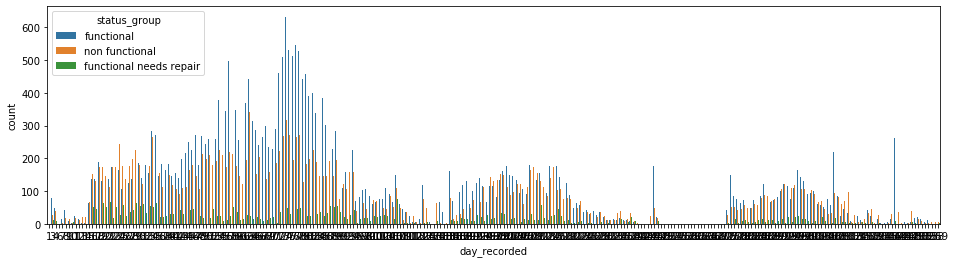

In [47]:
plt.figure(figsize=(16,4))
sns.countplot(x=df['day_recorded'], hue = df.status_group);

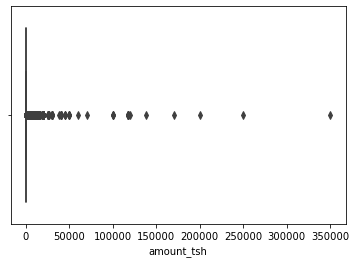

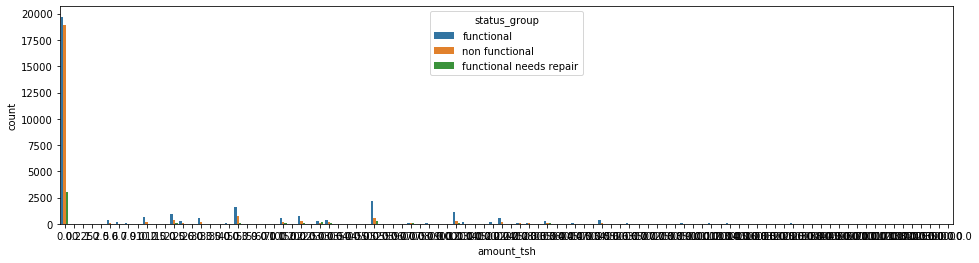

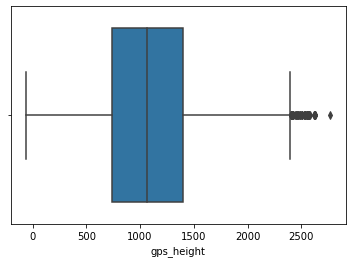

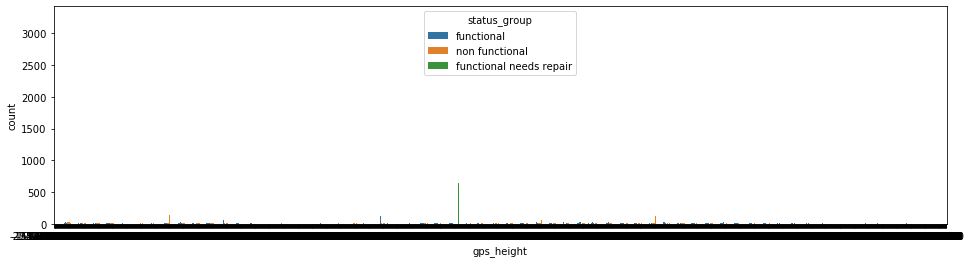

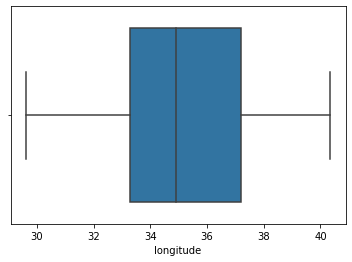

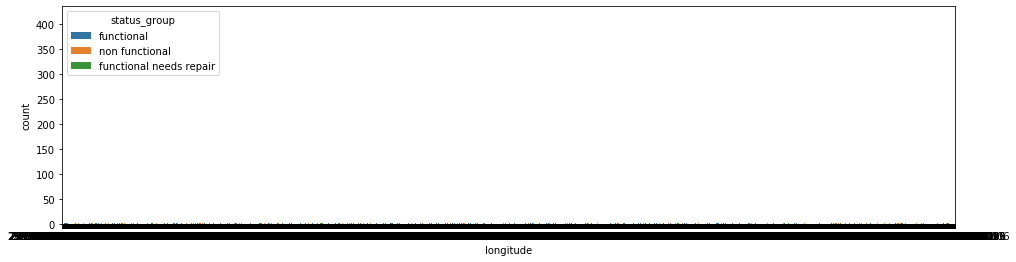

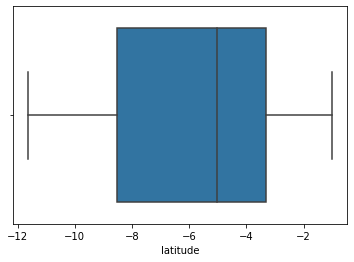

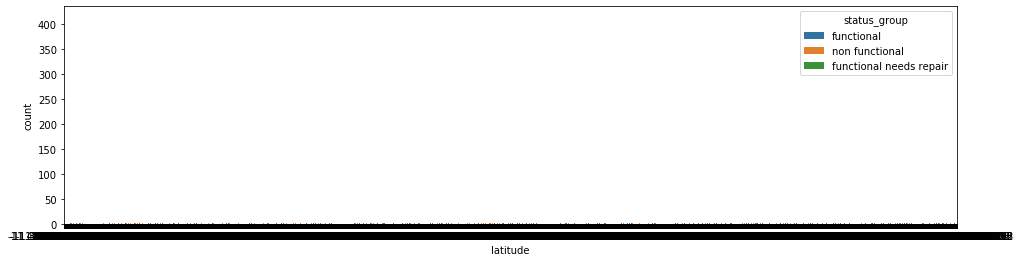

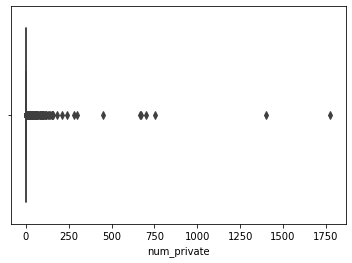

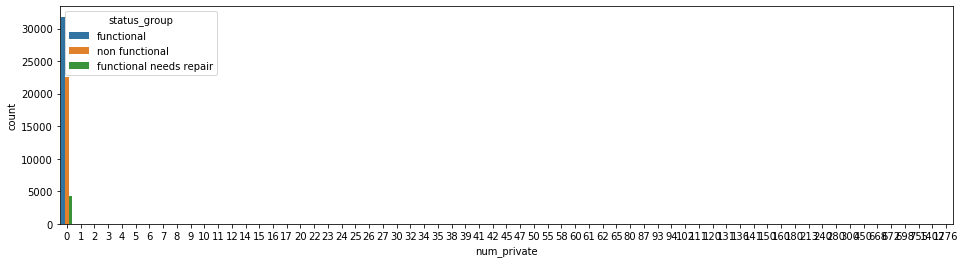

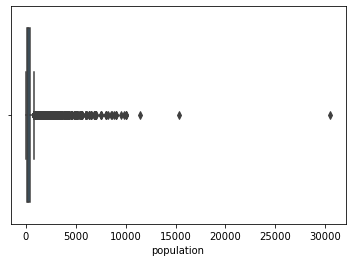

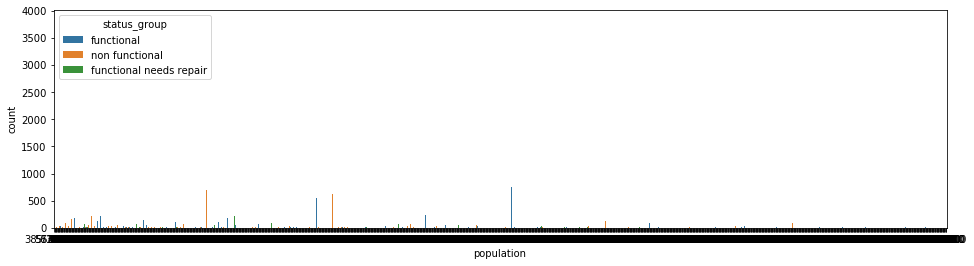

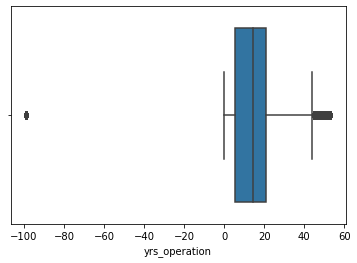

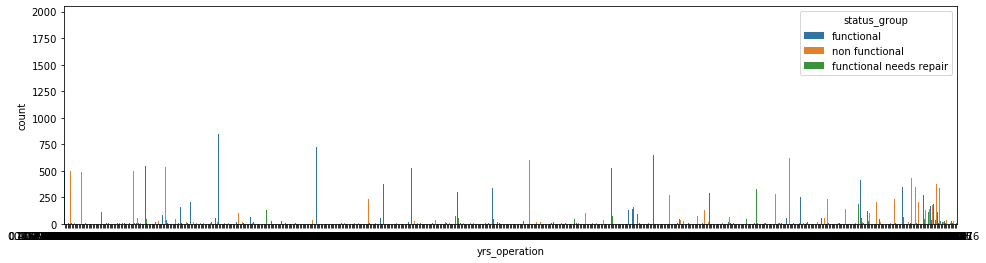

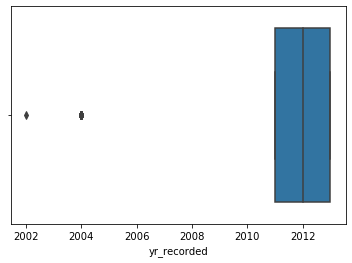

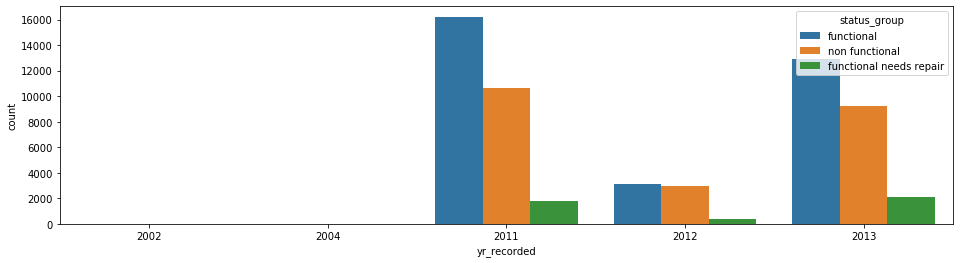

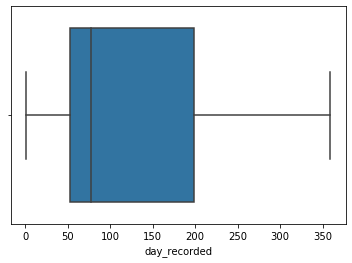

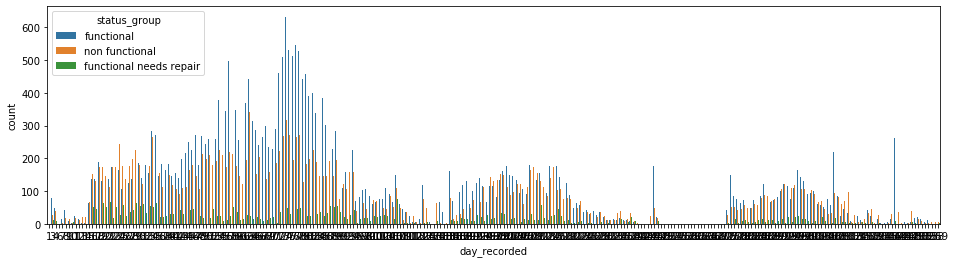

In [49]:
cols = df.select_dtypes(include=['int64', 'float64'])
for n, col in enumerate(cols):
    plt.figure(n)
    sns.boxplot(x=df[col]);
    plt.figure(n+len(cols), figsize=(16,4))
    sns.countplot(x=df[col], hue = df.status_group);
    

Aiming for a decision tree based algorithm, so I'm not as concerned with outliers as I would be otherwise.

Many categorical features with high cardinality    
Options:  
OHE  
non-sklearn algorithm  
target encoding -replace each category with its average target value   (regression, careful with multiclass problem (median or weighted median?))
    -from category_encoders import TargetEncoder  
